In [293]:
import pandas as pd

urlstops = 'https://raw.githubusercontent.com/dustinhodges/DS-Unit-2-Applied-Modeling/master/MplsStops.csv'
urldemo = 'https://raw.githubusercontent.com/dustinhodges/DS-Unit-2-Applied-Modeling/master/MplsDemo.csv'

stops = pd.read_csv(urlstops)
demo = pd.read_csv(urldemo)
print(stops.shape, demo.shape)

minn = pd.merge(stops, demo, how='outer', on='neighborhood')

print(minn.shape)


(51920, 15) (84, 9)
(51920, 23)


In [294]:
'''
'outcome', 
a newly engineered column will be our target. 
First we will clean three other columns in order to combine them:
'''

minn[['citationIssued',
      'personSearch',
      'vehicleSearch']] = minn[['citationIssued',
                                'personSearch',
                                'vehicleSearch']].fillna('Unknown')

end = minn['citationIssued'] + minn['personSearch'] + minn['vehicleSearch']
minn['outcome'] = end

minn['outcome'].value_counts()

UnknownNONO              21406
NONONO                   13805
UnknownUnknownUnknown     8221
YESNONO                   2662
UnknownYESYES             1452
UnknownYESNO              1422
NOYESNO                   1076
NOYESYES                   828
UnknownNOYES               309
YESYESYES                  251
YESYESNO                   208
NONOYES                    190
YESNOYES                    90
Name: outcome, dtype: int64

In [295]:
minn['MDC'].value_counts()

MDC      43699
other     8221
Name: MDC, dtype: int64

In [296]:
mdc = minn[minn['MDC']=='MDC']
mdc.shape

(43699, 24)

In [297]:
no_mdc = minn[minn['MDC']=='other']
no_mdc.shape

(8221, 24)

In [298]:
mdc['outcome'].value_counts()

UnknownNONO      21406
NONONO           13805
YESNONO           2662
UnknownYESYES     1452
UnknownYESNO      1422
NOYESNO           1076
NOYESYES           828
UnknownNOYES       309
YESYESYES          251
YESYESNO           208
NONOYES            190
YESNOYES            90
Name: outcome, dtype: int64

In [299]:
no_mdc['outcome'].value_counts()

UnknownUnknownUnknown    8221
Name: outcome, dtype: int64

In [300]:
no_mdc = no_mdc.copy()

In [301]:
no_mdc['outcome'].value_counts()

UnknownUnknownUnknown    8221
Name: outcome, dtype: int64

In [302]:
mdc = mdc.copy()

In [303]:

mdc.outcome = mdc.outcome.replace({"UnknownNONO": "citation only",
                                   "NONONO": "walk",
                                   "YESNONO": "citation only",
                                   "UnknownYESYES": "search",
                                   "UnknownYESNO": "search",
                                   "NOYESNO": "search",
                                   "NOYESYES": "search",
                                   "UnknownNOYES": "search",
                                   "YESYESYES": "search",
                                   "YESYESNO": "search",
                                   "NONOYES": "search",
                                   "YESNOYES": "search"}
                                   ) 
'''

minn.outcome = minn.outcome.replace({"UnknownNONO":"other",
                                     "NONONO":"other",
                                     "UnknownUnknownUnknown": "other",
                                     "YESNONO":               "search|citation",
                                     "UnknownYESYES":         "search|citation",
                                     "UnknownYESNO":          "search|citation",
                                     "NOYESNO":               "search|citation",
                                     "NOYESYES":              "search|citation",
                                     "UnknownNOYES":          "search|citation",
                                     "YESYESYES":             "search|citation",
                                     "YESYESNO":              "search|citation",
                                     "NONOYES":               "search|citation",
                                     "YESNOYES":              "search|citation"}
                                   ) 
'''
mdc['outcome'].value_counts()

citation only    24068
walk             13805
search            5826
Name: outcome, dtype: int64

In [304]:
13805/(13805 + 5826 + 24068)

0.31591111924758003

All unknowns come from no MDC

In [305]:
no_mdc['problem'].value_counts()

suspicious    5337
traffic       2884
Name: problem, dtype: int64

In [306]:
mdc['problem'].value_counts()

traffic       23214
suspicious    20485
Name: problem, dtype: int64

In [307]:
no_mdc['date'] = pd.to_datetime(no_mdc['date'], infer_datetime_format=True)
    
no_mdc['month'] = no_mdc['date'].dt.month
no_mdc['day'] = no_mdc['date'].dt.day
no_mdc['hour'] = no_mdc['date'].dt.hour
no_mdc = no_mdc.drop(columns='date')

null_cols = ['Unnamed: 0_x', 'idNum', 'MDC', 'citationIssued', 'personSearch',
             'vehicleSearch', 'preRace', 'race', 'Unnamed: 0_y', 'gender', 'outcome']

no_mdc = no_mdc.drop(null_cols, axis=1)
no_mdc.head()

,problem,lat,long,policePrecinct,neighborhood,population,white,black,foreignBorn,hhIncome,poverty,collegeGrad,month,day,hour
1,traffic,44.973080,-93.247720,1,Cedar Riverside,8247.0,0.353,0.464,0.408,18892.0,0.06,0.258,1,1,1
2,traffic,44.971340,-93.247020,1,Cedar Riverside,8247.0,0.353,0.464,0.408,18892.0,0.06,0.258,1,1,23
4,traffic,44.970210,-93.247250,1,Cedar Riverside,8247.0,0.353,0.464,0.408,18892.0,0.06,0.258,1,4,9
7,traffic,44.970763,-93.247251,1,Cedar Riverside,8247.0,0.353,0.464,0.408,18892.0,0.06,0.258,1,4,19
8,traffic,44.966620,-93.247250,1,Cedar Riverside,8247.0,0.353,0.464,0.408,18892.0,0.06,0.258,1,5,23


In [308]:
no_mdc['policePrecinct'].value_counts()

1    2303
4    1547
2    1534
3    1447
5    1390
Name: policePrecinct, dtype: int64

In [309]:
mdc['policePrecinct'].value_counts()

5    11435
4    10726
3     8345
2     7944
1     5249
Name: policePrecinct, dtype: int64

'outcome' has 3 discrete classes: 
walk, citation only, search.

'citation only' occurs 55% of the time. 'walk' occurs 32% of the time. 'search' occurs 13% of the time.

[ ] Choose which observations you will use to train, validate, and test your model.
Are some observations outliers? Will you exclude them?
Will you do a random split or a time-based split?

no_mdc is location specific and likely on foot.

There are no 'outliers' in this case with the possible exception of 'unknown' values where presumably the data was not recorded by police officers. We will not exclude them because we want our app to handle incomplete input information.
I will use a random split for train, test, validation.

[ ] Choose your evaluation metric(s).
Classification: Is your majority class frequency > 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?

I can use accuracy but I'll also want to explore precision and recall for certain classes. For example, predicting a particular outcome for a particular demographic etc could be "false alarm" or "failure to warn". Must decide which is worse...

In [310]:
minn.head()

,Unnamed: 0_x,idNum,date,problem,MDC,citationIssued,personSearch,vehicleSearch,preRace,race,...,neighborhood,Unnamed: 0_y,population,white,black,foreignBorn,hhIncome,poverty,collegeGrad,outcome
0,6823,17-000003,2017-01-01 00:00:42,suspicious,MDC,Unknown,NO,NO,Unknown,Unknown,...,Cedar Riverside,1.0,8247.0,0.353,0.464,0.408,18892.0,0.06,0.258,UnknownNONO
1,6834,17-000161,2017-01-01 01:15:01,traffic,other,Unknown,Unknown,Unknown,NaN,NaN,...,Cedar Riverside,1.0,8247.0,0.353,0.464,0.408,18892.0,0.06,0.258,UnknownUnknownUnknown
2,6909,17-001251,2017-01-01 23:45:15,traffic,other,Unknown,Unknown,Unknown,NaN,NaN,...,Cedar Riverside,1.0,8247.0,0.353,0.464,0.408,18892.0,0.06,0.258,UnknownUnknownUnknown
3,6992,17-002190,2017-01-02 21:46:12,suspicious,MDC,Unknown,NO,NO,White,White,...,Cedar Riverside,1.0,8247.0,0.353,0.464,0.408,18892.0,0.06,0.258,UnknownNONO
4,7134,17-003851,2017-01-04 09:06:24,traffic,other,Unknown,Unknown,Unknown,NaN,NaN,...,Cedar Riverside,1.0,8247.0,0.353,0.464,0.408,18892.0,0.06,0.258,UnknownUnknownUnknown


visualizations, 

[ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

In [311]:
import numpy as np
from sklearn.model_selection import train_test_split

train = mdc.copy()
train, test = train_test_split(train, train_size=0.80, test_size=0.20,
                               stratify=train['outcome'], random_state=42)
train, val = train_test_split(train, train_size=0.80, test_size=0.20,
                             stratify=train['outcome'], random_state=42)

train.shape, val.shape, test.shape

((27967, 24), (6992, 24), (8740, 24))

In [312]:
def wrangle(X):
    
    X = X.copy()

    unusable_variance = ['Unnamed: 0_x', 'idNum','citationIssued',
                         'personSearch', 'vehicleSearch', 'Unnamed: 0_y', 'MDC']
    X = X.drop(columns=unusable_variance)
    
    X['date'] = pd.to_datetime(X['date'], infer_datetime_format=True)
    
    X['month'] = X['date'].dt.month
    X['day'] = X['date'].dt.day
    X['hour'] = X['date'].dt.hour
    X = X.drop(columns='date')
    
    X['race_confusion'] = (X['race'] != X['preRace'])
    
    return X

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

train.shape, val.shape, test.shape

((27967, 20), (6992, 20), (8740, 20))


string encode policePrecinct


In [313]:
target = 'outcome'

X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test.drop(columns=target)
y_test = test[target]

In [314]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline

pipeline1 = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline1.fit(X_train, y_train)
print('Validation Accuracy', pipeline1.score(X_val, y_val))

Validation Accuracy 0.8009153318077803


Fit a model. Does it beat your baseline?

Our baseline is 55% 
With minimal feature engineering 
and basic RandomForestClassifier model, 
With date features, racial confusion, up to 80%

Unit 2, Sprint 3, Module 2
Permutation & Boosting

 
Continue to clean and explore your data. Make exploratory visualizations.
Complete Engineering with initial ideas. 

Try xgboost.
Get your model's permutation importances.



In [315]:
transformers = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [316]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=100,
                                                     

In [317]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_,
         feature_names).sort_values(ascending=False)

month             0.328919
problem           0.014388
day               0.014388
hour              0.007637
gender            0.003375
race              0.002403
long              0.002145
race_confusion    0.000515
lat              -0.000257
poverty          -0.000715
preRace          -0.001430
neighborhood     -0.002145
white            -0.002746
hhIncome         -0.002746
collegeGrad      -0.003232
population       -0.003461
foreignBorn      -0.003747
policePrecinct   -0.004062
black            -0.004262
dtype: float64

In [318]:
feature_names = X_val.columns.tolist()

eli5.show_weights(
    permuter,
    top=None, # show permutation importances for all features
    feature_names=feature_names
)

Weight,Feature
0.3289 ± 0.0115,month
0.0144 ± 0.0049,problem
0.0144 ± 0.0039,day
0.0076 ± 0.0037,hour
0.0034 ± 0.0038,gender
0.0024 ± 0.0029,race
0.0021 ± 0.0013,long
0.0005 ± 0.0035,race_confusion
-0.0003 ± 0.0034,lat
-0.0007 ± 0.0015,poverty


In [319]:
print('Shape before removing features:', X_train.shape)

Shape before removing features: (27967, 19)


In [320]:
minimum_importance = -0.0003
mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask]
X_train = X_train[features]

In [321]:
print('Shape after removing features:', X_train.shape)

Shape after removing features: (27967, 9)


In [322]:
X_val = X_val[features]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.8093535469107551


removing features slightly improved our validation accuracy

In [323]:
from xgboost import XGBClassifier

xgb = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

xgb.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['problem', 'race', 'gender'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'problem',
                                          'data_type': dtype('O'),
                                          'mapping': traffic       1
suspicious    2
NaN          -2
dtype: int64},
                                         {'col': 'race',
                                          'data_type': dtype('O'),
                                          'mapping': White              1
Black              2
Unknown            3
Native American    4
Latino             5
Asia...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_ra

In [324]:
from sklearn.metrics import accuracy_score
y_pred = xgb.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))

Validation Accuracy 0.80191647597254


In [325]:
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

model = XGBClassifier(
    n_estimators=1000,
    max_depth=7,
    learning_rate=0.5,
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train),
           (X_val_encoded, y_val)]

model.fit(X_train_encoded, y_train,
         eval_set=eval_set,
         eval_metric='merror',
         early_stopping_rounds=50)

[0]	validation_0-merror:0.190546	validation_1-merror:0.197511
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 50 rounds.
[1]	validation_0-merror:0.188579	validation_1-merror:0.197511
[2]	validation_0-merror:0.187221	validation_1-merror:0.195509
[3]	validation_0-merror:0.18504	validation_1-merror:0.193936
[4]	validation_0-merror:0.183538	validation_1-merror:0.192649
[5]	validation_0-merror:0.181142	validation_1-merror:0.193078
[6]	validation_0-merror:0.179783	validation_1-merror:0.193221
[7]	validation_0-merror:0.17796	validation_1-merror:0.193078
[8]	validation_0-merror:0.175957	validation_1-merror:0.193936
[9]	validation_0-merror:0.172954	validation_1-merror:0.193221
[10]	validation_0-merror:0.16995	validation_1-merror:0.194794
[11]	validation_0-merror:0.166089	validation_1-merror:0.194365
[12]	validation_0-merror:0.16262	validation_1-merror:0.193364
[13]	validation_0-merror:0.16040

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

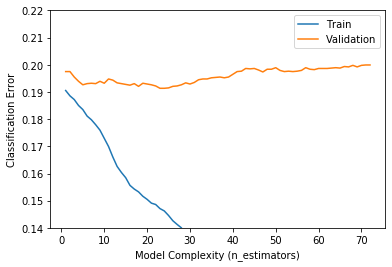

In [326]:
import matplotlib.pyplot as plt

results = model.evals_result()
train_error = results['validation_0']['merror']
val_error = results['validation_1']['merror']
epoch = range(1, len(train_error)+1)
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
plt.ylim((0.14, 0.22)) # Zoom in
plt.legend();

(<Figure size 1080x1080 with 4 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x114ae5550>,
  'pdp_ax': [<matplotlib.axes._subplots.AxesSubplot at 0x114dc0c90>,
   <matplotlib.axes._subplots.AxesSubplot at 0x114c29c90>]})

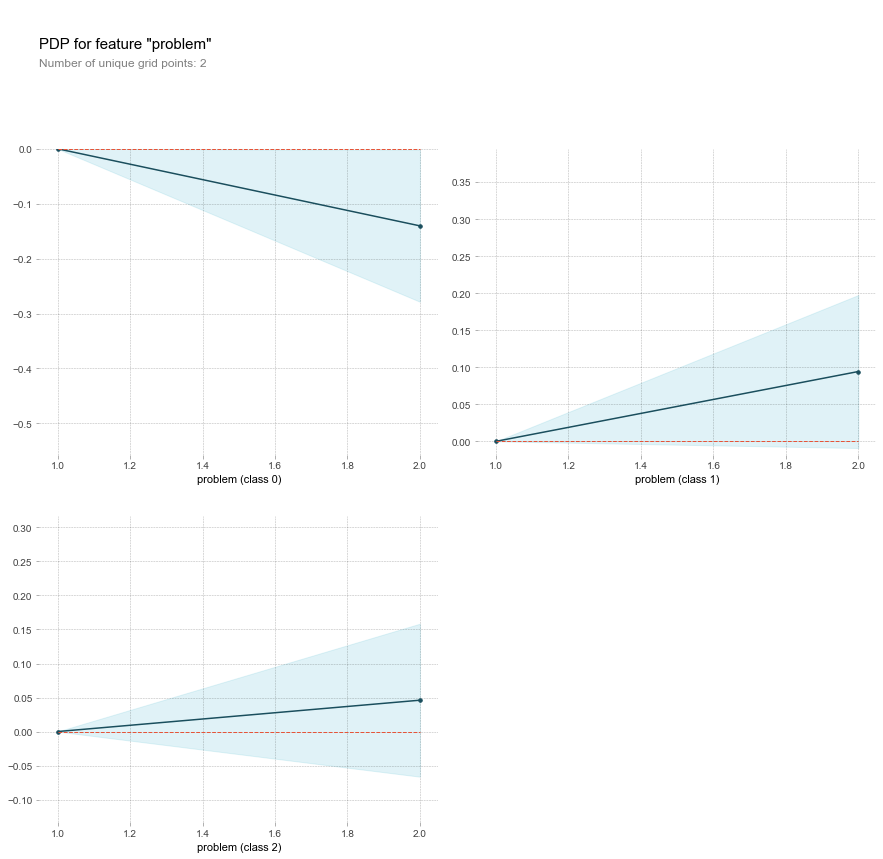

In [345]:
%matplotlib inline
from pdpbox import pdp
from pdpbox.pdp import pdp_interact, pdp_isolate, pdp_interact_plot

feature = 'problem'
pdp_dist = pdp.pdp_isolate(model=model,
                          dataset=X_val_encoded,
                          model_features=X_val_encoded.columns,
                          feature=feature)
pdp.pdp_plot(pdp_dist, feature)

In [346]:
encoder.mapping

[{'col': 'problem', 'mapping': traffic       1
  suspicious    2
  NaN          -2
  dtype: int64, 'data_type': dtype('O')},
 {'col': 'race', 'mapping': White              1
  Black              2
  Unknown            3
  Native American    4
  Latino             5
  Asian              6
  Other              7
  East African       8
  NaN               -2
  dtype: int64, 'data_type': dtype('O')},
 {'col': 'gender', 'mapping': Male       1
  Female     2
  Unknown    3
  NaN        4
  dtype: int64, 'data_type': dtype('O')}]

In [358]:
y_pred

array(['walk', 'citation only', 'citation only', ..., 'citation only',
       'walk', 'walk'], dtype=object)

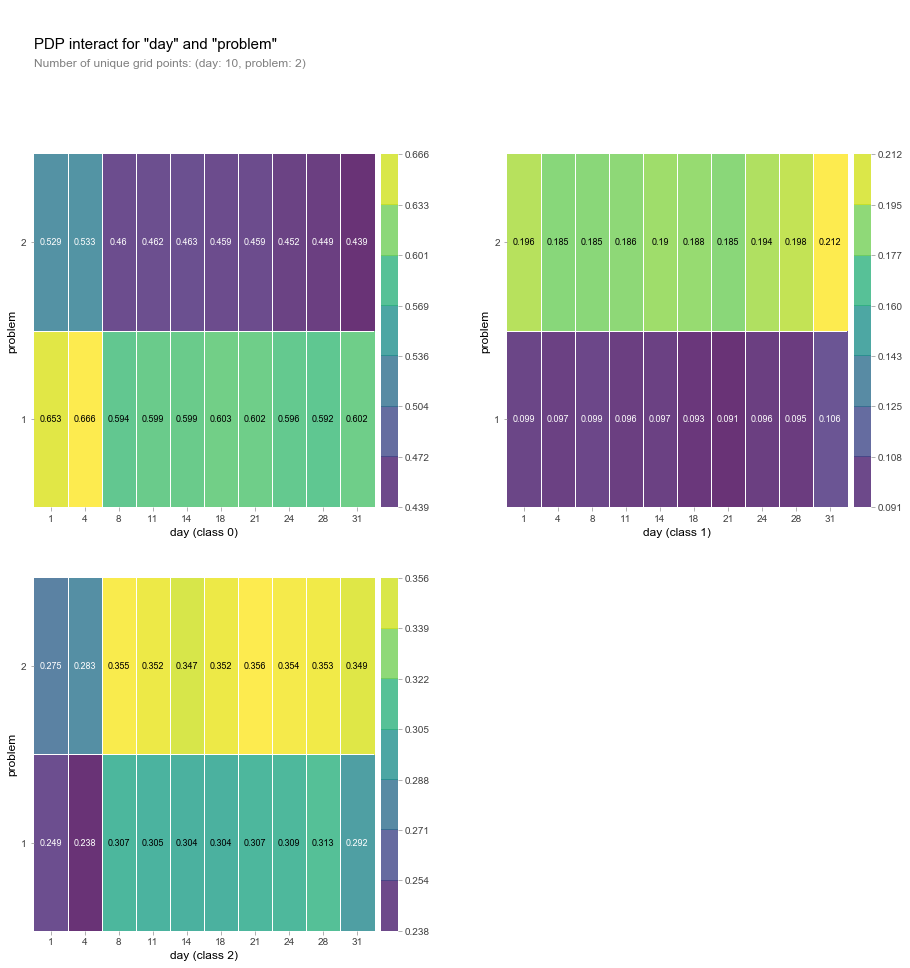

In [337]:
features = ['day', 'problem']

interaction = pdp_interact(
    model=model, 
    dataset=X_val_encoded, 
    model_features=X_val_encoded.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

In [341]:
%matplotlib inline
import matplotlib.pyplot as plt
from pdpbox import pdp

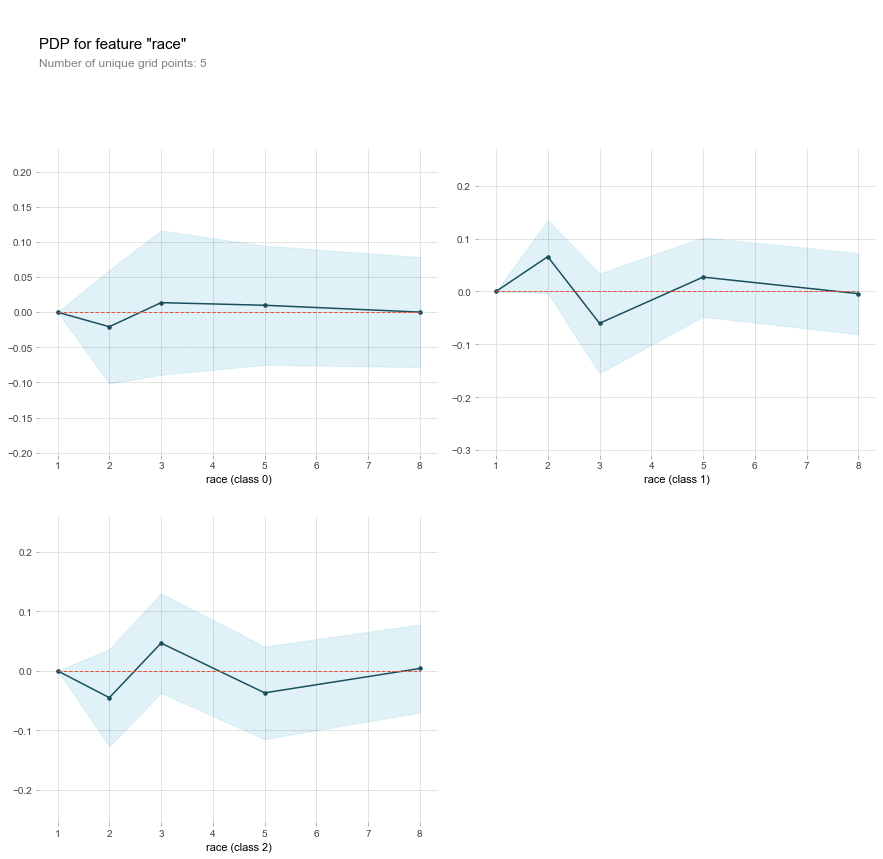

In [357]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'race'

isolated = pdp_isolate(
    model=model,
    dataset=X_val_encoded,
    model_features=X_val_encoded.columns,
    feature=feature
)

pdp_plot(isolated, feature_name=feature);


In [349]:
feature = 'race'
for item in encoder.mapping:
    if item['col'] == feature:
        feature_mapping = item['mapping']
        
feature_mapping = feature_mapping[feature_mapping.index.dropna()]
category_names = feature_mapping.index.tolist()
category_codes = feature_mapping.values.tolist()

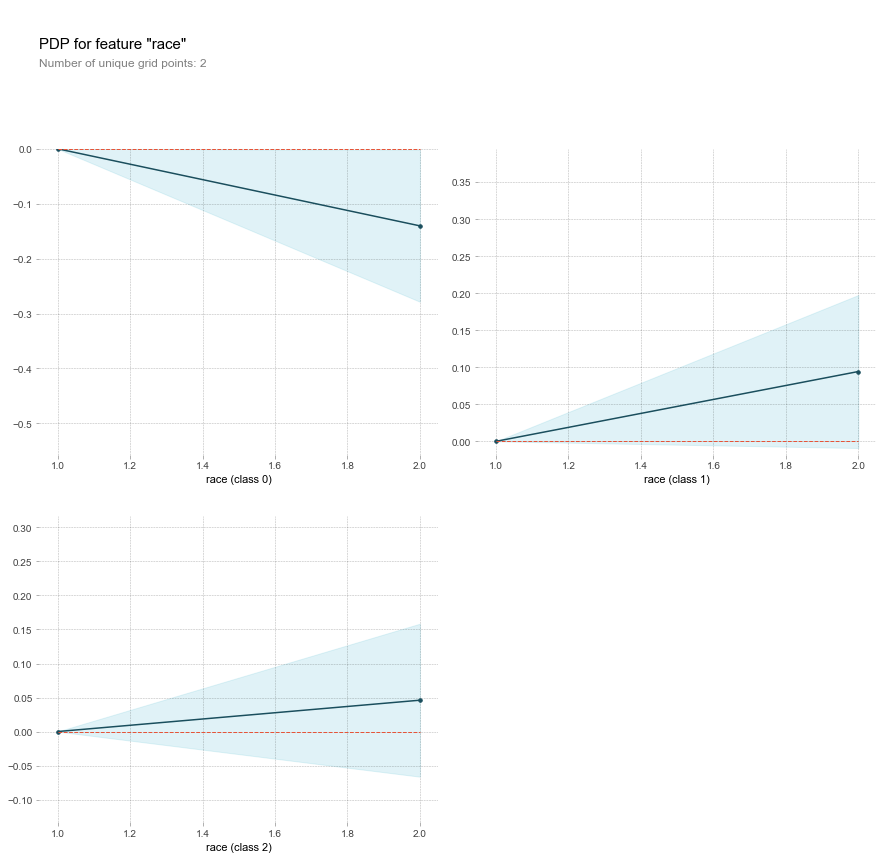

In [356]:
pdp.pdp_plot(pdp_dist, feature);

# Automatically change the xticks labels
#plt.xticks([1,2,3,4,5,6,7,8], ['White','Black','Unknown','Native_American','Latino','Asian','Other','East_African']);

In [331]:
train.head()

,problem,preRace,race,gender,lat,long,policePrecinct,neighborhood,population,white,black,foreignBorn,hhIncome,poverty,collegeGrad,outcome,month,day,hour,race_confusion
42045,traffic,White,White,Male,44.904425,-93.281251,5,Tangletown,4436.0,0.822,0.063,0.054,100158.0,0.051,0.680,walk,12,7,12,False
36835,suspicious,Black,Black,Male,44.948350,-93.274110,3,Central,8618.0,0.249,0.222,0.326,42856.0,0.053,0.264,walk,10,16,3,False
19487,suspicious,Black,Unknown,Female,44.948364,-93.290013,5,CARAG,5737.0,0.899,0.011,0.050,50696.0,0.049,0.603,citation only,6,26,7,True
23810,traffic,Unknown,Black,Female,44.938635,-93.277914,5,Lyndale,7441.0,0.515,0.226,0.285,38441.0,0.083,0.390,citation only,4,9,4,True
6016,suspicious,Unknown,Unknown,Unknown,44.953015,-93.274083,5,Whittier,14604.0,0.549,0.187,0.215,35855.0,0.038,0.399,citation only,3,9,1,False


In [332]:
X_test_encoded.shape

(10384, 22)

In [333]:
X_train.shape, X_val.shape, X_test.shape

((27967, 9), (6992, 9), (8740, 19))

In [334]:
from sklearn.metrics import roc_auc_score
X_test_encoded = encoder.transform(X_test)
class_index = 1
y_pred_proba = model.predict_proba(X_test_encoded)[:, class_index]
print(f'Test ROC AUC for class {class_index}:')
print(roc_auc_score(y_test, y_pred_proba)) # Ranges from 0-1, higher is better

ValueError: Unexpected input dimension 19, expected 9

In [148]:
y_pred_proba

array([0.1853826 , 0.00032824, 0.09079903, ..., 0.0312407 , 0.10957704,
       0.22292887], dtype=float32)

In [149]:
X_test.tail()

,problem,MDC,preRace,race,gender,lat,long,policePrecinct,neighborhood,population,...,foreignBorn,hhIncome,poverty,collegeGrad,race_MISSING,gender_MISSING,month,day,hour,race_confusion
39760,traffic,MDC,Unknown,White,Male,44.903546,-93.274309,3,Diamond Lake,5620.0,...,0.092,73668.0,0.050,0.531,False,False,12,2,18,True
38319,traffic,MDC,White,Black,Female,44.953616,-93.302125,5,East Isles,3261.0,...,0.087,82145.0,0.071,0.790,False,False,7,10,13,True
8747,suspicious,MDC,Unknown,Unknown,Unknown,44.984084,-93.244801,2,Marcy Holmes,10496.0,...,0.174,27104.0,0.042,0.587,False,False,2,11,19,False
49051,traffic,MDC,Unknown,White,Male,44.951887,-93.240820,3,Longfellow,4704.0,...,0.097,49378.0,0.057,0.390,False,False,5,5,22,True
12949,suspicious,MDC,East African,East African,Male,44.963327,-93.277813,5,Steven's Square - Loring Heights,3897.0,...,0.133,24783.0,0.053,0.512,False,False,5,9,0,False


In [150]:
row = X_test.loc[[12949]]
row

,problem,MDC,preRace,race,gender,lat,long,policePrecinct,neighborhood,population,...,foreignBorn,hhIncome,poverty,collegeGrad,race_MISSING,gender_MISSING,month,day,hour,race_confusion
12949,suspicious,MDC,East African,East African,Male,44.963327,-93.277813,5,Steven's Square - Loring Heights,3897.0,...,0.133,24783.0,0.053,0.512,False,False,5,9,0,False


In [151]:
import shap

explainer = shap.TreeExplainer(model)
row_processed = encoder.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row, 
    link='logit' 
)

In [157]:
def explain(row_number):
    positive_class = 'other'
    positive_class_index = 0
    
    row = X_test.loc[[row_number]]
    row_encoded = encoder.transform(row)
    
    pred = model.predict(row_encoded)[0]
    pred_proba = model.predict_proba(row_encoded)[0, positive_class_index]
    pred_proba *= 100
    if pred == positive_class:
        pred_proba = 100 - pred_proba
        
    print(f'The model predicts this stop results in {pred}, with {pred_proba:.0f}% probability.')
    
    shap_values = explainer.shap_values(row_encoded)
    
    feature_names = row.columns
    feature_values = row.values[0]
    shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))
    pros = shaps.sort_values(ascending=False)[:3].index
    cons = shaps.sort_values(ascending=True)[:3].index
    
    print('\n')
    print('Top 3 reasons for prediction:')
    evidence = pros if pred == positive_class else cons
    for i, info in enumerate(evidence, start=1):
        feature_name, feature_value = info
        print(f'{i}. {feature_name} is {feature_value}.')
        
    print('\n')
    print('Top counter-argument against prediction:')
    evidence = cons if pred == positive_class else pros
    feature_name, feature_value = evidence[0]
    print(f'- {feature_name} is {feature_value}.')
    
    shap.initjs()
    return shap.force_plot(
        base_value=explainer.expected_value, 
        shap_values=shap_values, 
        features=row, 
        link='logit'
    )

explain(12949)


The model predicts this stop results in other, with 22% probability.


Top 3 reasons for prediction:
1. hour is 0.
2. problem is suspicious.
3. gender is Male.


Top counter-argument against prediction:
- month is 5.


In [108]:
X_test.head(20)

,problem,MDC,preRace,race,gender,lat,long,policePrecinct,neighborhood,population,...,foreignBorn,hhIncome,poverty,collegeGrad,race_MISSING,gender_MISSING,month,day,hour,race_confusion
18640,traffic,MDC,Unknown,Unknown,Unknown,44.999148,-93.291816,4,Near - North,NaN,...,NaN,NaN,NaN,NaN,False,False,10,9,20,False
13304,suspicious,other,NaN,NaN,NaN,44.964078,-93.277815,5,Steven's Square - Loring Heights,3897.0,...,0.133,24783.0,0.053,0.512,True,True,9,14,12,True
10671,traffic,MDC,Unknown,White,Male,44.989254,-93.256363,2,Nicollet Island - East Bank,1393.0,...,0.138,83520.0,0.076,0.734,False,False,6,17,20,True
18376,suspicious,MDC,Unknown,Unknown,Unknown,44.988140,-93.294110,4,Near - North,NaN,...,NaN,NaN,NaN,NaN,False,False,8,23,15,False
47629,traffic,MDC,Unknown,East African,Male,44.919677,-93.217521,3,Hiawatha,5780.0,...,0.056,65925.0,0.045,0.537,False,False,11,22,20,True
34957,suspicious,MDC,Unknown,Black,Male,44.948367,-93.251864,3,East Phillips,4661.0,...,0.385,35224.0,0.104,0.216,False,False,3,3,18,True
9437,traffic,other,NaN,NaN,NaN,44.982710,-93.241320,2,Marcy Holmes,10496.0,...,0.174,27104.0,0.042,0.587,True,True,6,18,23,True
3010,suspicious,MDC,White,Unknown,Male,44.974390,-93.272510,1,Downtown West,7141.0,...,0.203,67086.0,0.057,0.551,False,False,7,7,15,True
17593,suspicious,MDC,Unknown,Unknown,Unknown,44.991499,-93.298829,4,Near - North,NaN,...,NaN,NaN,NaN,NaN,False,False,4,25,18,False
29858,suspicious,MDC,Unknown,Latino,Male,44.936828,-93.277915,5,King Field,7686.0,...,0.069,74606.0,0.037,0.640,False,False,1,29,1,True


Assignment
Complete these tasks for your project, and document your work.

[ ] Continue to iterate on your project: data cleaning, exploratory visualization, feature engineering, modeling.
[ ] Make a Shapley force plot to explain at least 1 individual prediction.
[ ] Share at least 1 visualization (of any type) on Slack.
But, if you aren't ready to make a Shapley force plot with your own dataset today, that's okay. You can practice this objective with another dataset instead. You may choose any dataset you've worked with previously.

Stretch Goals
[ ] Make Shapley force plots to explain at least 4 individual predictions.
If your project is Binary Classification, you can do a True Positive, True Negative, False Positive, False Negative.
If your project is Regression, you can do a high prediction with low error, a low prediction with low error, a high prediction with high error, and a low prediction with high error.
[ ] Use Shapley values to display verbal explanations of individual predictions.
[ ] Use the SHAP library for other visualization types.
The SHAP repo has examples for many visualization types, including:

Force Plot, individual predictions
Force Plot, multiple predictions
Dependence Plot
Summary Plot
Summary Plot, Bar
Interaction Values
Decision Plots